In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from datetime import datetime

import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import warnings

import folium
from folium import plugins
from folium import FeatureGroup

In [ ]:
df1.to_csv('crime.csv', index=False)

In [2]:
df1 = pd.read_csv('crime.csv',encoding_errors='ignore')
df1

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [3]:
df2 = pd.read_csv('offense_codes.csv',encoding_errors='ignore')
df2

,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION
...,...,...
571,1806,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
574,2010,HOME INVASION


## Data Cleaning

## Renamee Columns 

- Mengubah nama column agar mudah dipahami .

In [4]:

df1.rename(columns={"INCIDENT_NUMBER": "IncidentID", "OFFENSE_CODE":"OffenseCode", "OFFENSE_CODE_GROUP":"OffenseCG",
                    "OFFENSE_DESCRIPTION": "OffenseDesc", "DISTRICT": "District", "REPORTING_AREA":"ReportingArea",
                    "SHOOTING":"Shooting","OCCURRED_ON_DATE":"OccurredOn","YEAR":"Year","MONTH":"Month","DAY_OF_WEEK":"Day",
                    "HOUR":"Hour","UCR_PART":"UCR","STREET":"Street","Lat":"Latitude","Long":"Longitude"} , inplace= True)

Memisahkan column data 'OccuredOn'menjadi pembagian Tanggal dan Waktu.

In [5]:
df1['Date'] = pd.to_datetime(df1['OccurredOn']).dt.date
df1['Time'] = pd.to_datetime(df1['OccurredOn']).dt.time
del df1['OccurredOn']

In [6]:
df1

,IncidentID,OffenseCode,OffenseCG,OffenseDesc,District,ReportingArea,Shooting,Year,Month,Day,Hour,UCR,Street,Latitude,Longitude,Location,Date,Time
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02,13:00:00
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21,00:00:00
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03,19:27:00
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03,21:16:00
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03,21:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05,17:25:00
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09,13:38:00
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09,13:38:00
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",2016-05-31,19:35:00


# Mengecek Missing Value pada Dataframe 1 dan 2

terliat di dataframe 1 terdapat sangat banyak missing value .

In [7]:
df1.isna().sum()

IncidentID            0
OffenseCode           0
OffenseCG             0
OffenseDesc           0
District           1765
ReportingArea         0
Shooting         318054
Year                  0
Month                 0
Day                   0
Hour                  0
UCR                  90
Street            10871
Latitude          19999
Longitude         19999
Location              0
Date                  0
Time                  0
dtype: int64

dataframe 2 tidak terdapat missing value .

In [8]:
df2.isna().sum()

CODE    0
NAME    0
dtype: int64

In [9]:
for column in ['District', 'UCR' , 'ReportingArea']:
    df1[column].fillna(df1[column].mode()[0], inplace=True)


In [10]:
#SHOOTING MISSING VALUE
df1["Shooting"].fillna('N' , inplace = True )

In [11]:
df1.isna().sum()

IncidentID           0
OffenseCode          0
OffenseCG            0
OffenseDesc          0
District             0
ReportingArea        0
Shooting             0
Year                 0
Month                0
Day                  0
Hour                 0
UCR                  0
Street           10871
Latitude         19999
Longitude        19999
Location             0
Date                 0
Time                 0
dtype: int64

Melakukan Drop column pada data yang terdapat missing value / data yang hilang.

In [12]:
df1.dropna(inplace=True)

- Data sudah Bersih

In [13]:
df1.isna().sum()

IncidentID       0
OffenseCode      0
OffenseCG        0
OffenseDesc      0
District         0
ReportingArea    0
Shooting         0
Year             0
Month            0
Day              0
Hour             0
UCR              0
Street           0
Latitude         0
Longitude        0
Location         0
Date             0
Time             0
dtype: int64

- Mengecek data yang duplikat

In [14]:
df1.duplicated().sum()

22

- pada dataframe ke 2 terdapat data yang duplikat 

In [15]:
df2.duplicated().sum()

84

In [16]:
df2.drop_duplicates(inplace=True)

- Membuat dataframe untuk 2 tahun (2016&2017) , dikarenakan di 2 tahun tersebut memiliki data yang jelas dan lengkap.

In [17]:
df_2016_2017=df1.loc[df1.loc[:,'Year'].between(2016,2017)].copy()
df_2016_2017.head()

,IncidentID,OffenseCode,OffenseCG,OffenseDesc,District,ReportingArea,Shooting,Year,Month,Day,Hour,UCR,Street,Latitude,Longitude,Location,Date,Time
569,I182070304,1107,Fraud,FRAUD - IMPERSONATION,D4,905,N,2017,11,Wednesday,0,Part Two,E BROOKLINE ST,42.339268,-71.072088,"(42.33926764, -71.07208833)",2017-11-01,00:00:00
744,I182070115,3114,Investigate Property,INVESTIGATE PROPERTY,D14,793,N,2017,10,Wednesday,17,Part Three,KELTON ST,42.346501,-71.136128,"(42.34650102, -71.13612792)",2017-10-11,17:43:00
923,I182069920,3201,Property Lost,PROPERTY - LOST,B2,287,N,2017,8,Thursday,12,Part Three,SHAWMUT AVE,42.331925,-71.084112,"(42.33192532, -71.08411222)",2017-08-31,12:08:00
1162,I182069657,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,774,N,2017,6,Tuesday,7,Part Two,COMMONWEALTH AVE,42.338482,-71.152890,"(42.33848236, -71.15288978)",2017-06-27,07:00:00
1444,I182069334,3201,Property Lost,PROPERTY - LOST,B3,420,N,2017,12,Friday,22,Part Three,MORTON ST,42.279591,-71.081323,"(42.27959103, -71.08132258)",2017-12-08,22:00:00


- untuk melihat lebih detail kasus pertahun nya

In [18]:
crime_years =df_2016_2017.groupby('Year')['OffenseCG']
crime_years.value_counts().sort_values(ascending=False).head(6)

Year  OffenseCG                      
2017  Motor Vehicle Accident Response    9616
2016  Motor Vehicle Accident Response    9334
      Larceny                            7613
2017  Larceny                            7553
      Medical Assistance                 7394
2016  Medical Assistance                 6622
Name: OffenseCG, dtype: int64

In [19]:
crime_df_2016=crime_years.get_group(2016).value_counts().sort_values(ascending=False).head(5)

crime_df_2017=crime_years.get_group(2017).value_counts().sort_values(ascending=False).head(5)

In [20]:
crime_df_2016

Motor Vehicle Accident Response    9334
Larceny                            7613
Medical Assistance                 6622
Investigate Person                 5523
Other                              5187
Name: OffenseCG, dtype: int64

In [21]:
crime_df_2017

Motor Vehicle Accident Response    9616
Larceny                            7553
Medical Assistance                 7394
Investigate Person                 6352
Other                              4998
Name: OffenseCG, dtype: int64

## Data Visulization

- Jenis kasus apa saja yang tertinggi di tahun 2016-2017?

In [22]:
top10 = df_2016_2017['OffenseCG'].value_counts().sort_values(ascending=False).head(10)

top10

Motor Vehicle Accident Response    18950
Larceny                            15166
Medical Assistance                 14016
Investigate Person                 11875
Other                              10185
Vandalism                           9506
Simple Assault                      8973
Drug Violation                      8615
Verbal Disputes                     8434
Investigate Property                7008
Name: OffenseCG, dtype: int64

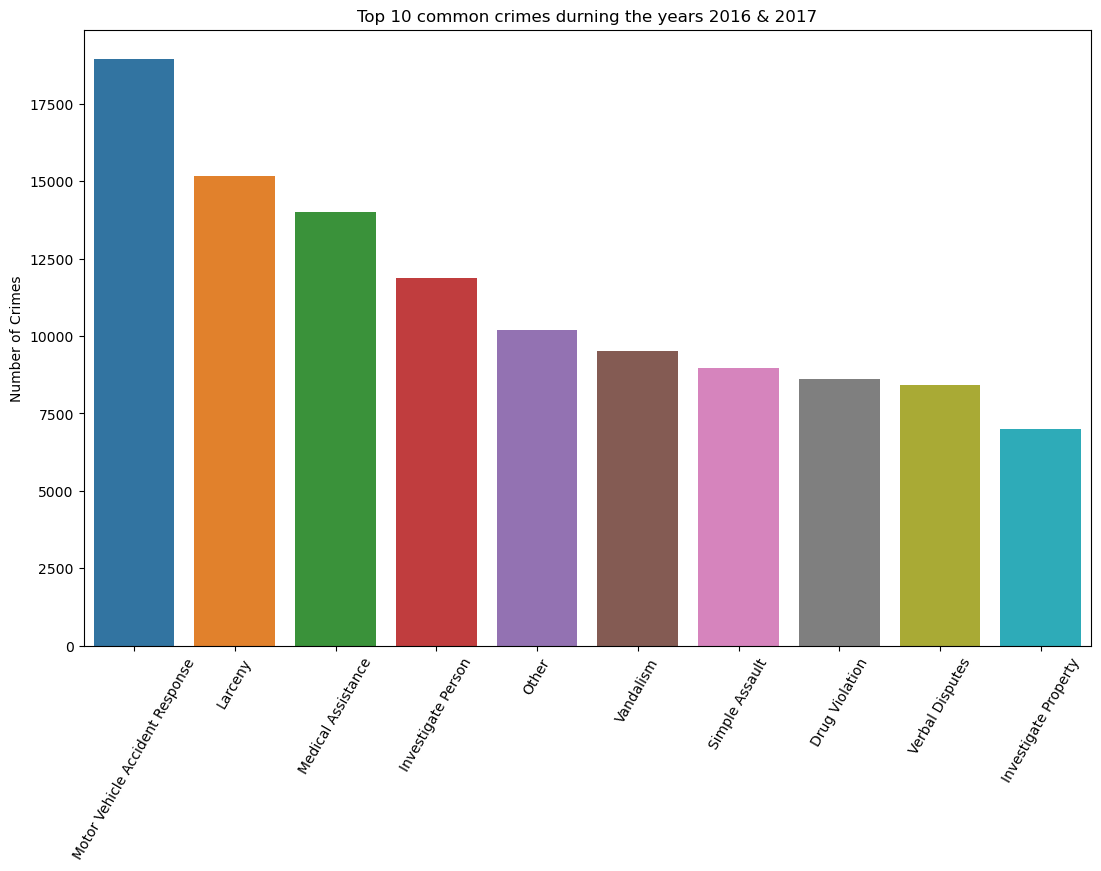

In [23]:
# plot the Top Ten common crimes during the years 2016,2017
# Set the width and height of the figure
plt.figure(figsize=(13,8))

# Add title
plt.title("Top 10 common crimes durning the years 2016 & 2017")

sns.barplot(x=top10.index,y=top10)

#Rotate x-labels, otherwise it's utterly hectic
plt.xticks(rotation=60)

# Add label for vertical axis
plt.ylabel("Number of Crimes");

kita lihat lebih dalam lagi , apakah kriminal dari tahun 2016 - 2017 ada membaik?

In [24]:
year = df_2016_2017['Year'].value_counts()

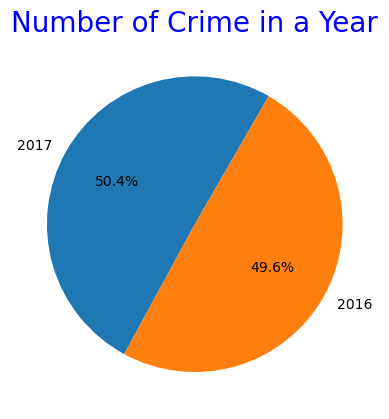

In [25]:
plt.title('Number of Crime in a Year',fontsize=20,color = 'blue')


labels = ['2017','2016']


plt.pie(year,startangle=60, labels=labels, autopct='%0.01f%%')

plt.show()

- kita lihat lebih dalam lagi dalam hitungan bulanan , apakah kriminal tsb mengalami kebaikan atau kenaikan?

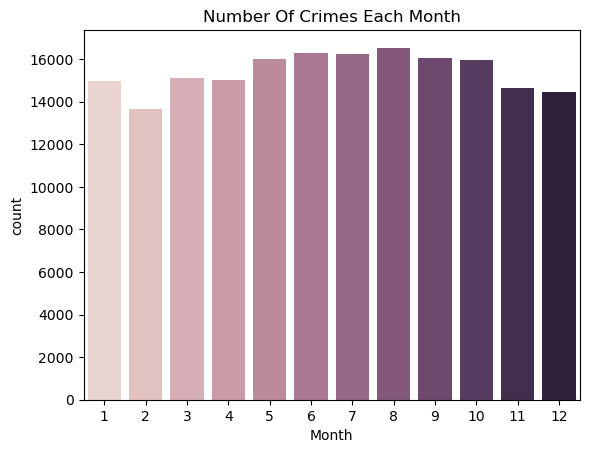

In [26]:
sns.countplot(x ="Month", data = df_2016_2017.reset_index(), palette="ch:54").set(title='Number Of Crimes Each Month');

In [27]:
df_2016_2017

,IncidentID,OffenseCode,OffenseCG,OffenseDesc,District,ReportingArea,Shooting,Year,Month,Day,Hour,UCR,Street,Latitude,Longitude,Location,Date,Time
569,I182070304,1107,Fraud,FRAUD - IMPERSONATION,D4,905,N,2017,11,Wednesday,0,Part Two,E BROOKLINE ST,42.339268,-71.072088,"(42.33926764, -71.07208833)",2017-11-01,00:00:00
744,I182070115,3114,Investigate Property,INVESTIGATE PROPERTY,D14,793,N,2017,10,Wednesday,17,Part Three,KELTON ST,42.346501,-71.136128,"(42.34650102, -71.13612792)",2017-10-11,17:43:00
923,I182069920,3201,Property Lost,PROPERTY - LOST,B2,287,N,2017,8,Thursday,12,Part Three,SHAWMUT AVE,42.331925,-71.084112,"(42.33192532, -71.08411222)",2017-08-31,12:08:00
1162,I182069657,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,774,N,2017,6,Tuesday,7,Part Two,COMMONWEALTH AVE,42.338482,-71.152890,"(42.33848236, -71.15288978)",2017-06-27,07:00:00
1444,I182069334,3201,Property Lost,PROPERTY - LOST,B3,420,N,2017,12,Friday,22,Part Three,MORTON ST,42.279591,-71.081323,"(42.27959103, -71.08132258)",2017-12-08,22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319053,I100636670-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05,17:23:00
319057,I100033064-00,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,B2,304,N,2016,7,Friday,18,Part Two,SLAYTON WAY,42.321770,-71.097798,"(42.32177032, -71.09779774)",2016-07-29,18:20:00
319058,I100033064-00,2910,Violations,VAL - OPERATING AFTER REV/SUSP.,B2,304,N,2016,7,Friday,18,Part Two,SLAYTON WAY,42.321770,-71.097798,"(42.32177032, -71.09779774)",2016-07-29,18:20:00
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05,17:25:00


         Day  IncidentID
0     Friday       28281
1  Wednesday       27007
2   Thursday       26990
3    Tuesday       26687
4     Monday       26203
5   Saturday       26035
6     Sunday       23846


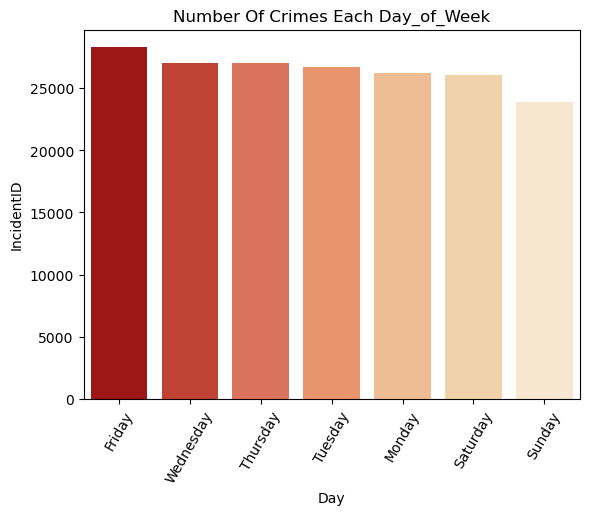

In [28]:
days = df_2016_2017.groupby('Day').count()['IncidentID'].sort_values(ascending=False).reset_index()
ax = sns.barplot(x = 'Day', y="IncidentID", data = days, palette='OrRd_r')
plt.xticks(rotation=60)
plt.title('Number Of Crimes Each Day_of_Week')
print(days)

- untuk lebih lanjut mari kita cari tau lebih dalam dan detail berdasarkan waktu.

In [29]:
def day_night(h): 
    if h>=12:
        return "Evening"
    elif h<=5:
        return "Night"
    else:
        return "Morning"

In [30]:
df_2016_2017['Day/night'] = df_2016_2017.loc[:,'Hour'].apply(day_night).head()
df_2016_2017.head()

,IncidentID,OffenseCode,OffenseCG,OffenseDesc,District,ReportingArea,Shooting,Year,Month,Day,Hour,UCR,Street,Latitude,Longitude,Location,Date,Time,Day/night
569,I182070304,1107,Fraud,FRAUD - IMPERSONATION,D4,905,N,2017,11,Wednesday,0,Part Two,E BROOKLINE ST,42.339268,-71.072088,"(42.33926764, -71.07208833)",2017-11-01,00:00:00,Night
744,I182070115,3114,Investigate Property,INVESTIGATE PROPERTY,D14,793,N,2017,10,Wednesday,17,Part Three,KELTON ST,42.346501,-71.136128,"(42.34650102, -71.13612792)",2017-10-11,17:43:00,Evening
923,I182069920,3201,Property Lost,PROPERTY - LOST,B2,287,N,2017,8,Thursday,12,Part Three,SHAWMUT AVE,42.331925,-71.084112,"(42.33192532, -71.08411222)",2017-08-31,12:08:00,Evening
1162,I182069657,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,774,N,2017,6,Tuesday,7,Part Two,COMMONWEALTH AVE,42.338482,-71.152890,"(42.33848236, -71.15288978)",2017-06-27,07:00:00,Morning
1444,I182069334,3201,Property Lost,PROPERTY - LOST,B3,420,N,2017,12,Friday,22,Part Three,MORTON ST,42.279591,-71.081323,"(42.27959103, -71.08132258)",2017-12-08,22:00:00,Evening


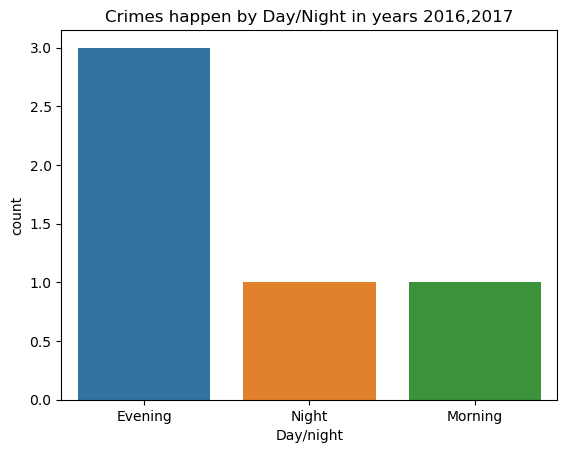

In [31]:
sns.countplot(x=df_2016_2017['Day/night'],order=['Evening','Night','Morning']);
plt.title('Crimes happen by Day/Night in years 2016,2017');

In [32]:
df1['Day/night'] = df1.loc[:,'Hour'].apply(day_night)
df1.head(5)

,IncidentID,OffenseCode,OffenseCG,OffenseDesc,District,ReportingArea,Shooting,Year,Month,Day,Hour,UCR,Street,Latitude,Longitude,Location,Date,Time,Day/night
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02,13:00:00,Evening
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21,00:00:00,Night
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03,19:27:00,Evening
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03,21:16:00,Evening
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03,21:05:00,Evening


Text(0.5, 1.0, 'Highest Criminal District in Boston by 2016-2017')

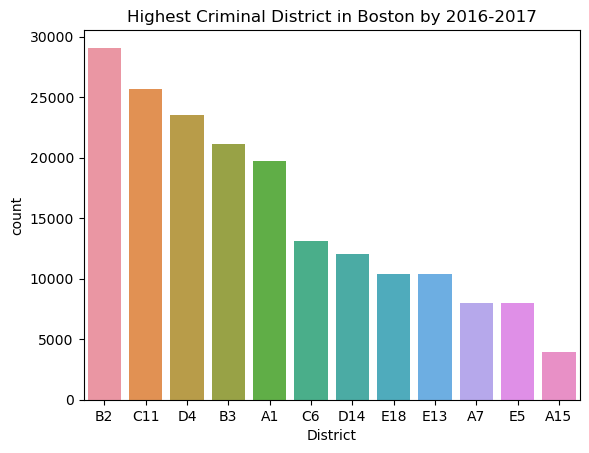

In [33]:
district_crime = df_2016_2017['District'].value_counts(ascending=False).index
sns.countplot(x='District', data=df_2016_2017 , order=district_crime);
plt.title('Highest Criminal District in Boston by 2016-2017')

kita dapat melihat District B2 menjadi yang tertinggi dan District A15 menjadi yang terendah dalam kasus criminal di Boston

In [34]:
df1

,IncidentID,OffenseCode,OffenseCG,OffenseDesc,District,ReportingArea,Shooting,Year,Month,Day,Hour,UCR,Street,Latitude,Longitude,Location,Date,Time,Day/night
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02,13:00:00,Evening
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21,00:00:00,Night
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03,19:27:00,Evening
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03,21:16:00,Evening
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03,21:05:00,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05,17:25:00,Evening
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09,13:38:00,Evening
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,N,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09,13:38:00,Evening
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",2016-05-31,19:35:00,Evening


In [35]:
# f = folium.Figure(width=800, height=500)
# boston_map = folium.Map(location = [df1['Latitude'].mean(), 
#                                   df1['Longitude'].mean()], 
#                       zoom_start = 8).add_to(f)

# # fg = folium.Map.FeatureGroup()
# mc = plugins.MarkerCluster().add_to(boston_map)

# for lat,long,labels in zip (df1['Latitude'],df1['Longitude'],df1['OffenseDesc']):
#     folium.Marker(location=[lat,long],popup=labels).add_to(mc)


# boston_map.add_child(mc)

# boston_map

## Summary

In [36]:
high_day = df_2016_2017['Day'].value_counts().index[0]
high_hour = df_2016_2017['Hour'].value_counts().index[0]
high_month = df_2016_2017['Month'].value_counts().index[0]
high_year = df_2016_2017['Year'].value_counts().index[0]
high_district = df_2016_2017['District'].value_counts().index[0]
high_street = df_2016_2017['Street'].value_counts().index[0]
high_daynight = df_2016_2017['Day/night'].value_counts().index[0]
high_criminal = df_2016_2017['OffenseCG'].value_counts().index[0]

print('Most Criminal in a day =', high_day)
print('Most Criminal in a hour =', high_hour)
print('Most Criminal in a month =', high_month)
print('Most Criminal in a year =', high_year)
print('Most Criminal in a district =', high_district)
print('Most Criminal in a street =', high_street)
print('Most Criminal in a day/night =', high_daynight)
print('Most Criminal case in boston =', high_criminal)

Most Criminal in a day = Friday
Most Criminal in a hour = 17
Most Criminal in a month = 8
Most Criminal in a year = 2017
Most Criminal in a district = B2
Most Criminal in a street = WASHINGTON ST
Most Criminal in a day/night = Evening
Most Criminal case in boston = Motor Vehicle Accident Response
